We are building price prediction for used cars using ML MODEL:
WE NEED THREE THINGS:
DATA PREPROCESSING
1. handling missing data
2.feature (column ) engineering : where new coloumns are added or ocnverted into new data like in nos.
3. standardization or converting into common unit
MODEL CONSTRUCTION
using linear regression for showing linear relations between feature and target
decission tree for showing non linear relations
MODEL EVALUATION
to check our model is good or no use MAE or RMSE .

In [6]:
import numpy as np                                        #numerical python library for numbers
import pandas as pd                                       #to handle data manipulation name as panel data
from sklearn.linear_model import LinearRegression           #to import linear regression model to to work and show grpahycally
from sklearn.model_selection import train_test_split         #splitting of data for practice as train data and use the model on test data or unseen data
from sklearn.tree import DecisionTreeRegressor               #to import decision tree model
from sklearn.metrics import mean_absolute_error, mean_squared_error     #
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
Car = pd.read_csv('/content/car (1) (1).csv', encoding='latin1')
Car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


handle the missing value if any by isnull function

In [8]:
Car.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


now its time to fill missing values by two ways
1. fill them with mean value
2. just remove that entire row out of list

in below output kms_driven has text data or commas in cells instead of numeric value thats why 52 missing value are there 55 missing in fuel_type bec data is diesel or petrol as text form .

In [9]:
Car.fillna(Car.select_dtypes(include=['number']).mean(), inplace=True)
Car.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


now we need to know the age of car means how old it is by subtracting tha year of manufacturing from current year and store it in new column called car_age .
but in year column of Car has non numeric values like /,..,gahs,ngdmd ,32nahe , Nna45 etc. means all types of data is there . so first convert all data in numerical type by using
Car['year'] = pd.to_numeric(Car['year'], errors='coerce') errors help to convert symbols into NaN ( Not a Number ) .
all NaN fill with 0 by Car['year'] = Car['year'].fillna(0)
this convert all data into integer Car['year'] = Car['year'].astype('int64')


In [10]:

# Convert the 'year' column to numeric type, handling errors
Car['year'] = pd.to_numeric(Car['year'], errors='coerce')

# Fill NaN values with a suitable replacement, e.g., 0
Car['year'] = Car['year'].fillna(0)

# Convert the 'year' column to integer type
Car['year'] = Car['year'].astype('int64')

# Calculate the car age
Car['car_age'] = 2024 - Car['year']

Car.head()

,name,company,year,Price,kms_driven,fuel_type,car_age
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,17
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,18
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,6
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,10
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,10


now its time to define X,Y  as reuqired for linear regression graph .
X as feature(Car_age, mileage, fuel type , etccc..) and Y as Price  
features are used to predict price.

In [11]:
# Convert 'Price' to string first, handling NaN values
Car['Price'] = Car['Price'].fillna('0').astype(str)

# Replace non-numeric prices (like 'Ask For Price') with 0
Car['Price'] = Car['Price'].apply(lambda x: x if x.replace(',', '').isdigit() else '0')

# Convert 'Price' column to numeric values
Car['Price'] = Car['Price'].str.replace(',', '').astype(float)

# Convert 'kms_driven' to string first, handling NaN values
Car['kms_driven'] = Car['kms_driven'].fillna('0').astype(str)

# Convert 'kms_driven' column to numeric values
Car['kms_driven'] = Car['kms_driven'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Select features and target
x = Car[['car_age', 'kms_driven']]
y = Car['Price']



Now before starting of linear model we need to decide training , test part of our data . so split the data into training and test data into 80% into train and 20% into test data

In [12]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shape of the training data
print(x_train.shape, x_test.shape)




(713, 2) (179, 2)


lets create linear regression

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill NaN with the mean
x_train = imputer.fit_transform(x_train) # Fit and transform the training data
x_test = imputer.transform(x_test) # Transform the test data

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(x_test)


lets create decision tree

In [16]:
# Initialize the Decision Tree model
dt = DecisionTreeRegressor()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(x_test)


lets evaluate this 2 models

In [18]:
# Mean Absolute Error (MAE) for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Root Mean Squared Error (RMSE) for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')

# Mean Absolute Error (MAE) for Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Root Mean Squared Error (RMSE) for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f'Decision Tree MAE: {mae_dt}')
print(f'Decision Tree RMSE: {rmse_dt}')



Linear Regression MAE: 244144.1676839342
Linear Regression RMSE: 340635.307361719
Decision Tree MAE: 233580.24013035384
Decision Tree RMSE: 443960.00179520174


compare them

In [19]:
if mae_dt < mae_lr and rmse_dt < rmse_lr:
    print("Decision Tree performs better.")
else:
    print("Linear Regression performs better.")


Linear Regression performs better.


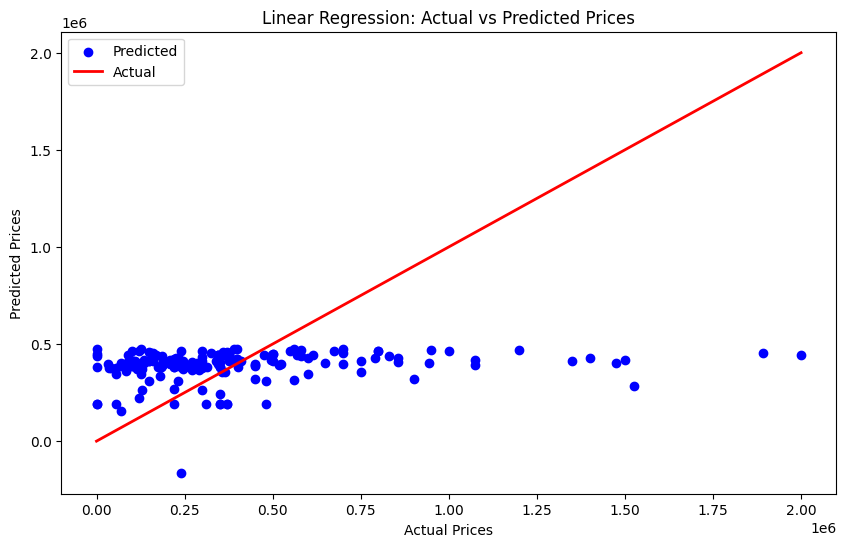

In [20]:
# Plot actual vs predicted prices (for Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Actual')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


the prediction says that
Most of the blue dots are below the red line, which means the model is under-predicting the prices (it predicted a lower price than the actual price).
As the actual price (X-axis) increases, the model's predictions show more spread, and it seems the model struggles to predict higher-priced cars accurately.
In summary, the Linear Regression model does a decent job predicting lower car prices but struggles with high-priced cars, where the predictions tend to be less accurate.